# Etapa de análisis exploratorio.

# Importación de librerías para analisis exploratorio

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#   Mapeo de variables, Funciones, variables de entorno
Se definen funciones importantes para el desarrollo del análisis exploratorio y mapeo de variables para interpretabiliad humana.

## Variables de entorno
- data_sample : porcentaje de registros con los que se va a realizar análisis (entre 0 y 1).

In [2]:
dict_columns = {
            'Time':'Time (min)',
            'Temperature':'Temperature (°C)',
            'ProcessTemperature':'ProcessTemperature (°C)',
            'AgentType':'AgentType',
            'AgentFlow':'AgentFlow (L/min)',
            'SampleType':'SampleType',
            'CatalystType':'CatalystType',
            'CatalystRatio':'CatalystRatio (%)',
            'CarbonMonoxide':'CarbonMonoxide (vol%)',
            'CarbonDioxide':'CarbonDioxide (vol%)',
            'Methane':'Methane (vol%)',
            'Oxygen':'Oxygen (vol%)',
            'Hydrogen':'Hydrogen (vol%)',
            'CalorificValue':'CalorificValue (kcal/m3)'
        }

data_sample = 1 

# Importación de los datos y verificación de su estado actual
Se importan los datos y se procede a realizar una inspección estructural:

- Dimensiones del dataset (n muestras, n variables)
- Tipos de datos (numérico, categórico, booleano)
- Variables objetivo
- Unidades físicas
- Variables redundantes
- Si se presentan anomálias en sus registros, como datos nulos
- Analizar las variables categóricas que valores unicos tiene.


In [3]:
df_original = pd.read_csv("../data/raw/kaggle_GasificationDataset.csv",sep=";")

df_original = df_original.sample(frac=data_sample, random_state=1307)

num_cols = df_original.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_original.select_dtypes(include="object").columns
df_original[cat_cols] = df_original[cat_cols].astype("category")

print('\n====  Verificación de los datos  ====\n')
display(df_original.head())

print('\n====  Filas/Columnas ====\n')
display(f'Filas: {df_original.shape[0]}, Columnas: {df_original.shape[1]}')

print('\n====  Columnas/Tipo de dato ====\n')
df_original.info()

print('\n====  Medidas descriptivas de los datos  ====\n')
display(df_original.describe())

print('\n====  Medidas descriptivas de los datos categóricos  ====\n')


for col in cat_cols:
    print(f"\nVariable: {col}")
    print(f"Cantidad de categorías: {df_original[col].nunique()}")
    print("Valores únicos:")
    print(df_original[col].unique().tolist())




====  Verificación de los datos  ====



Time  Temperature  ProcessTemperature AgentType  AgentFlow SampleType  \
862     21          737                 800       Air      0.050       TWTS   
2396     2            9                1000       Air      0.100       TWTS   
1096     1            6                1000       Air      0.050       TWTS   
1230     3           12                1000       Air      0.050       TWTS   
3358    40          900                 900   Oxygen       0.015       TWTS   

      CatalystType  CatalystRatio  CarbonMonoxide  CarbonDioxide  Methane  \
862          None            20.0            1.00          14.32     7.00   
2396  Marble dust             5.0            0.00           2.60     0.00   
1096         None             5.0            0.00           2.45     0.00   
1230         None            15.0            0.00           2.76     0.00   
3358  Marble dust             5.0           18.37           6.97     3.85   

      Oxygen  Hydrogen  CalorificValue  
862    12.72     10.00          998.81  
2396   21.00      0.00            0.00  
1096   21.84      0.00            0.00  
1230   21.00      0.00            0.00  
3358    1.85     27.15         1742.19


====  Filas/Columnas ====



'Filas: 3748, Columnas: 14'


====  Columnas/Tipo de dato ====

<class 'pandas.core.frame.DataFrame'>
Index: 3748 entries, 862 to 3153
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Time                3748 non-null   int64   
 1   Temperature         3748 non-null   int64   
 2   ProcessTemperature  3748 non-null   int64   
 3   AgentType           3748 non-null   category
 4   AgentFlow           3748 non-null   float64 
 5   SampleType          3748 non-null   category
 6   CatalystType        3748 non-null   category
 7   CatalystRatio       3748 non-null   float64 
 8   CarbonMonoxide      3748 non-null   float64 
 9   CarbonDioxide       3748 non-null   float64 
 10  Methane             3748 non-null   float64 
 11  Oxygen              3748 non-null   float64 
 12  Hydrogen            3748 non-null   float64 
 13  CalorificValue      3748 non-null   float64 
dtypes: category(3), float64(8), int64(3)
memory usage: 362.7

Time  Temperature  ProcessTemperature    AgentFlow  \
count  3748.000000  3748.000000         3748.000000  3748.000000   
mean     34.646211   677.584045          879.882604     0.070668   
std      22.345009   295.996258           90.903522     0.053300   
min       0.000000     6.000000          700.000000     0.015000   
25%      16.000000   581.000000          800.000000     0.050000   
50%      32.000000   800.000000          900.000000     0.050000   
75%      50.000000   900.000000          900.000000     0.100000   
max     101.000000  1000.000000         1000.000000     0.400000   

       CatalystRatio  CarbonMonoxide  CarbonDioxide      Methane       Oxygen  \
count    3748.000000     3748.000000    3748.000000  3748.000000  3748.000000   
mean        6.336713        9.699130       7.625542     6.065622     7.259971   
std         5.866147        8.081061       6.353793     6.395410     7.374089   
min         0.000000       -0.010000       0.000000     0.000000     0.000000   
25%         0.000000        2.000000       2.720000     0.590000     0.440000   
50%         5.000000        9.000000       4.740000     4.000000     4.815000   
75%        10.000000       15.485000      11.372500    10.000000    11.605000   
max        20.000000       41.330000      37.400000    27.000000    22.920000   

          Hydrogen  CalorificValue  
count  3748.000000     3748.000000  
mean     13.587465     1280.532399  
std      11.004823     1002.031733  
min      -0.100000       -0.300000  
25%       1.000000      280.870000  
50%      14.000000     1254.520000  
75%      23.000000     2066.050000  
max      37.450000     4046.740000


====  Medidas descriptivas de los datos categóricos  ====


Variable: AgentType
Cantidad de categorías: 2
Valores únicos:
['Air', 'Oxygen ']

Variable: SampleType
Cantidad de categorías: 2
Valores únicos:
['TWTS', 'Leather scraps ']

Variable: CatalystType
Cantidad de categorías: 3
Valores únicos:
['None ', 'Marble dust ', 'AI-Ni ']


# Resumen primera etapa : 

- Dimensiones del dataset : 'Filas: 3748, Columnas: 14'
- Tipos de datos (numérico, categórico, booleano) : todos son numéricos float
- Variables objetivo : principalmente "Methane" y "Hydrogen"
- Unidades físicas : no estan indicadas directamente pero desde la fuente de donde se tomaron los datos estan estipuladas y se deja para hacer mapping en procedimientos siguientes
- Variables redundantes : no hay presencia
- Variables categóricas : no tiene categorías repetidas con distinto nombre

# Calidad de datos :

- Valores faltantes 
- Valores atípicos (outliers)
- Inconsistencias físicas (ej. temperatura negativa si no es posible)
- Duplicados
- Rango de variables

In [4]:
print('\n==== Cantidad de datos nulos (cantidad y %) ====')
display(df_original.isna().sum())


==== Cantidad de datos nulos (cantidad y %) ====


Time                  0
Temperature           0
ProcessTemperature    0
AgentType             0
AgentFlow             0
SampleType            0
CatalystType          0
CatalystRatio         0
CarbonMonoxide        0
CarbonDioxide         0
Methane               0
Oxygen                0
Hydrogen              0
CalorificValue        0
dtype: int64


==== Análisis de valores atípicos ====


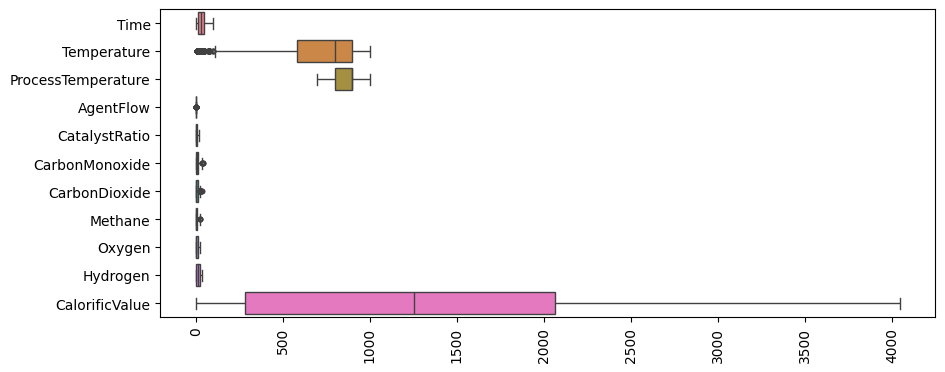

In [5]:
# Boxplot - análisis de outliers en cada variable
print('\n==== Análisis de valores atípicos ====')

plt.figure(figsize=(10,4))
sns.boxplot(
    data=df_original[num_cols],
    orient="h",
    showfliers=True,
    flierprops={"marker": "o", "markersize": 3, "alpha": 0.7}
)
plt.xticks(rotation=90)
plt.show()


==== Análisis de valores atípicos, con variables estandarizadas ====


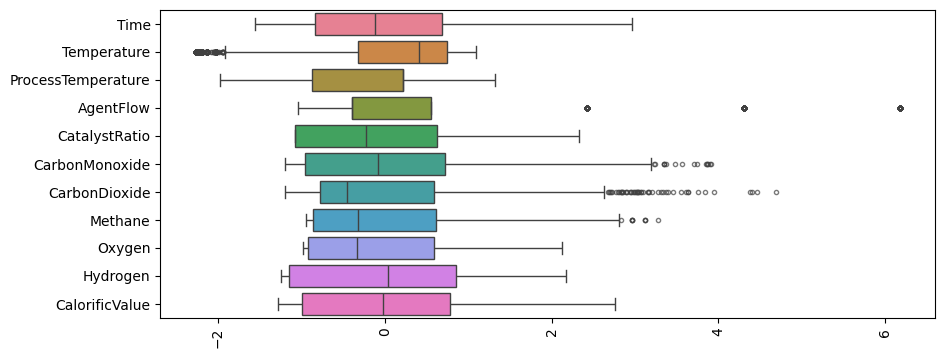

In [6]:
print('\n==== Análisis de valores atípicos, con variables estandarizadas ====')
scaler = StandardScaler()
df_scaled = df_original.copy()
df_scaled[num_cols] = scaler.fit_transform(df_original[num_cols])

plt.figure(figsize=(10,4))
sns.boxplot(
    data=df_scaled[num_cols],
    orient="h",
    showfliers=True,
    flierprops={"marker": "o", "markersize": 3, "alpha": 0.7}
)
plt.xticks(rotation=90)
plt.show()

In [7]:
outlier_mask = np.abs(df_scaled[num_cols]) > 3
outlier_count = outlier_mask.sum()
outlier_percent = (outlier_count / len(df_scaled)) * 100
outlier_summary = pd.DataFrame({
    "n_outliers": outlier_count,
    "%_outliers": outlier_percent
}).sort_values("n_outliers", ascending=False)

print(outlier_summary)

                    n_outliers  %_outliers
AgentFlow                   79    2.107791
CarbonDioxide               30    0.800427
CarbonMonoxide              25    0.667022
Methane                      4    0.106724
ProcessTemperature           0    0.000000
Time                         0    0.000000
Temperature                  0    0.000000
CatalystRatio                0    0.000000
Oxygen                       0    0.000000
Hydrogen                     0    0.000000
CalorificValue               0    0.000000


In [8]:
# Verificación de duplicados
print('\n==== Conteo de registros duplicados ====')
print(f"cantidad de registros duplicados : {df_original.duplicated().sum()}")

# --- Para eliminar registros duplicados
# df_original = df_original.drop_duplicates()


==== Conteo de registros duplicados ====
cantidad de registros duplicados : 0


In [9]:
summary_range = df_original[num_cols].agg(["min", "max"]).T
summary_range["range"] = summary_range["max"] - summary_range["min"]

print(summary_range)

                        min      max     range
Time                  0.000   101.00   101.000
Temperature           6.000  1000.00   994.000
ProcessTemperature  700.000  1000.00   300.000
AgentFlow             0.015     0.40     0.385
CatalystRatio         0.000    20.00    20.000
CarbonMonoxide       -0.010    41.33    41.340
CarbonDioxide         0.000    37.40    37.400
Methane               0.000    27.00    27.000
Oxygen                0.000    22.92    22.920
Hydrogen             -0.100    37.45    37.550
CalorificValue       -0.300  4046.74  4047.040


# Resumen segunda etapa :

- Valores faltantes : no hay valores faltantes.
- Valores atípicos (outliers) : se considera extremo valores con Z > 3, en este caso podemos seguir trabajando con el condjunto de datos ya que el porcentaje por variable de valores atípicos esta alrededor del 2%. 
- Inconsistencias físicas (ej. temperatura negativa si no es posible) : en las medidas descriptivas, no se evidencia temperaturas negativas, esta en escala absoluta K
- Duplicados : no hay registros duplicados
- Rango de variables : (ver procedimiento)

# Estadística descriptiva.

- media
- mediana
- desviación estándar
- mínimo y máximo
- percentiles

Para variables categóricas:
- frecuencia
- proporciones

In [10]:
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]

num_stats = df_original[num_cols].describe(percentiles=percentiles).T
num_stats["median"] = df_original[num_cols].median()
num_stats["range"] = num_stats["max"] - num_stats["min"]

num_stats = num_stats[
    ["mean", "median", "std", "min", "1%", "5%", "25%", "50%", "75%", "95%", "99%", "max", "range"]
]

print("\n==== Estadística descriptiva - Variables Numéricas ====\n")
display(num_stats)


==== Estadística descriptiva - Variables Numéricas ====



mean    median          std      min       1%  \
Time                  34.646211    32.000    22.345009    0.000    1.000   
Temperature          677.584045   800.000   295.996258    6.000    9.000   
ProcessTemperature   879.882604   900.000    90.903522  700.000  700.000   
AgentFlow              0.070668     0.050     0.053300    0.015    0.015   
CatalystRatio          6.336713     5.000     5.866147    0.000    0.000   
CarbonMonoxide         9.699130     9.000     8.081061   -0.010    0.000   
CarbonDioxide          7.625542     4.740     6.353793    0.000    0.000   
Methane                6.065622     4.000     6.395410    0.000    0.000   
Oxygen                 7.259971     4.815     7.374089    0.000    0.000   
Hydrogen              13.587465    14.000    11.004823   -0.100    0.000   
CalorificValue      1280.532399  1254.520  1002.031733   -0.300    0.000   

                         5%     25%       50%        75%        95%  \
Time                  4.000   16.00    32.000    50.0000    76.0000   
Temperature          21.000  581.00   800.000   900.0000  1000.0000   
ProcessTemperature  700.000  800.00   900.000   900.0000  1000.0000   
AgentFlow             0.015    0.05     0.050     0.1000     0.1000   
CatalystRatio         0.000    0.00     5.000    10.0000    20.0000   
CarbonMonoxide        0.000    2.00     9.000    15.4850    23.9595   
CarbonDioxide         1.310    2.72     4.740    11.3725    20.2465   
Methane               0.000    0.59     4.000    10.0000    19.8595   
Oxygen                0.000    0.44     4.815    11.6050    21.0000   
Hydrogen              0.000    1.00    14.000    23.0000    31.0065   
CalorificValue        0.000  280.87  1254.520  2066.0500  3003.2720   

                          99%      max     range  
Time                  93.0000   101.00   101.000  
Temperature         1000.0000  1000.00   994.000  
ProcessTemperature  1000.0000  1000.00   300.000  
AgentFlow              0.3000     0.40     0.385  
CatalystRatio         20.0000    20.00    20.000  
CarbonMonoxide        30.4571    41.33    41.340  
CarbonDioxide         26.0206    37.40    37.400  
Methane               23.0000    27.00    27.000  
Oxygen                21.5300    22.92    22.920  
Hydrogen              35.0000    37.45    37.550  
CalorificValue      3439.9368  4046.74  4047.040

In [11]:
print("\n==== Estadística descriptiva - Variables Categóricas ====\n")

for col in cat_cols:
    print(f"\nVariable: {col}")
    
    freq = df_original[col].value_counts(dropna=False)
    prop = df_original[col].value_counts(normalize=True, dropna=False) * 100
    
    summary = pd.DataFrame({
        "frequency": freq,
        "percentage": prop
    })
    
    print(summary)


==== Estadística descriptiva - Variables Categóricas ====


Variable: AgentType
           frequency  percentage
AgentType                       
Air             3137   83.697972
Oxygen           611   16.302028

Variable: SampleType
                 frequency  percentage
SampleType                            
TWTS                  2186    58.32444
Leather scraps        1562    41.67556

Variable: CatalystType
              frequency  percentage
CatalystType                       
Marble dust        1319   35.192102
None               1268   33.831377
AI-Ni              1161   30.976521


# Análisis de distribuciones :

- Histogramas
- KDE
- Boxplots
- Densidades

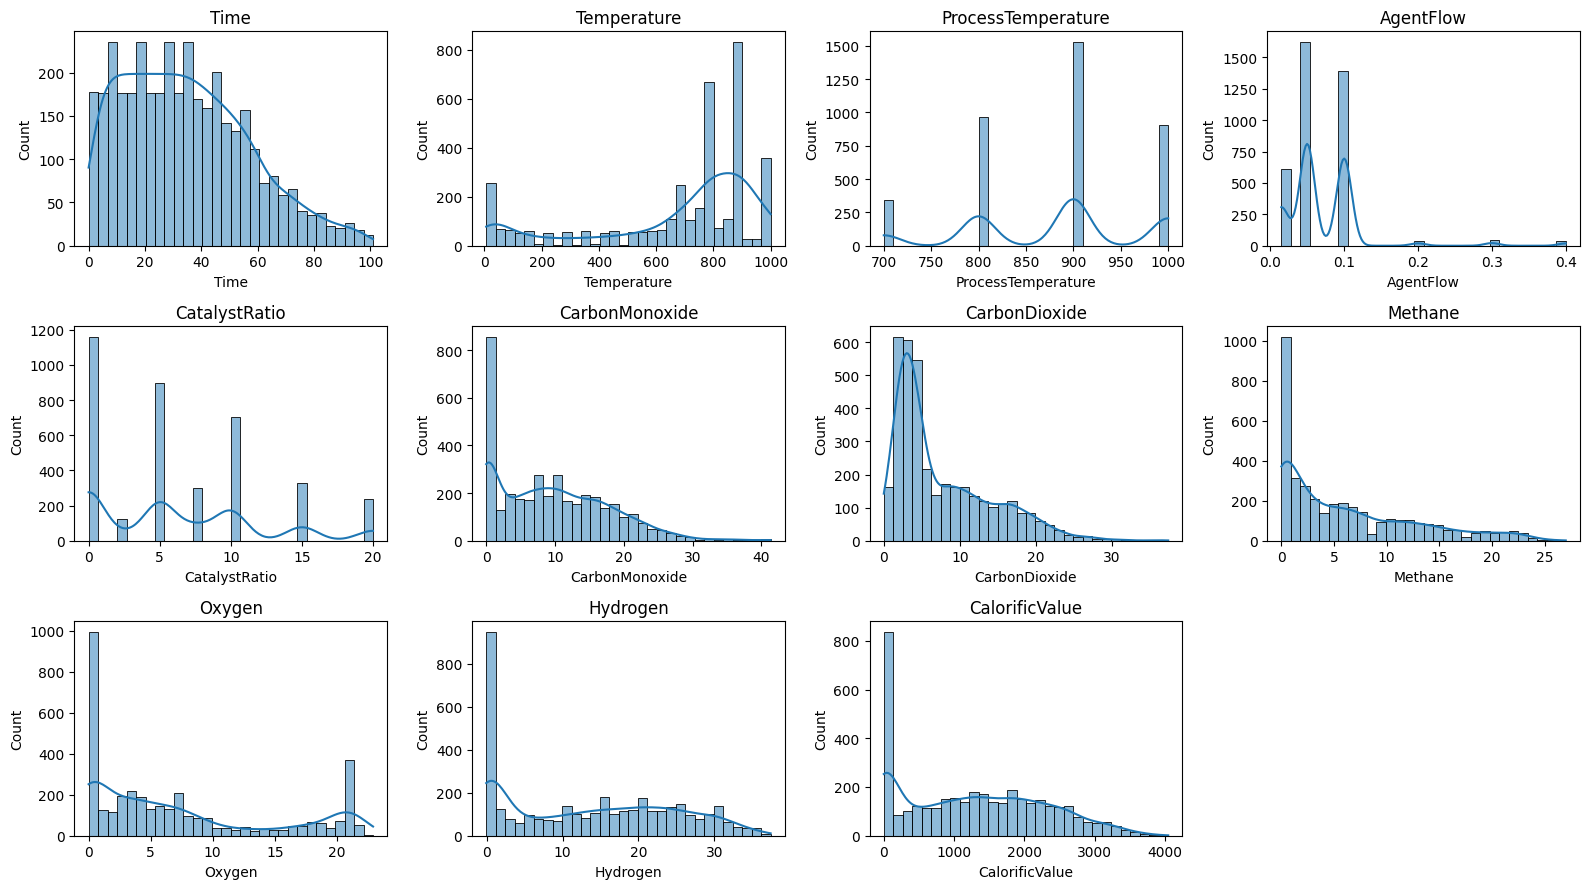

In [12]:
n = len(num_cols)
n_cols = math.ceil(math.sqrt(n))
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # sns.kdeplot(df_original[col], fill=True, ax=axes[i])
    sns.histplot(df_original[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

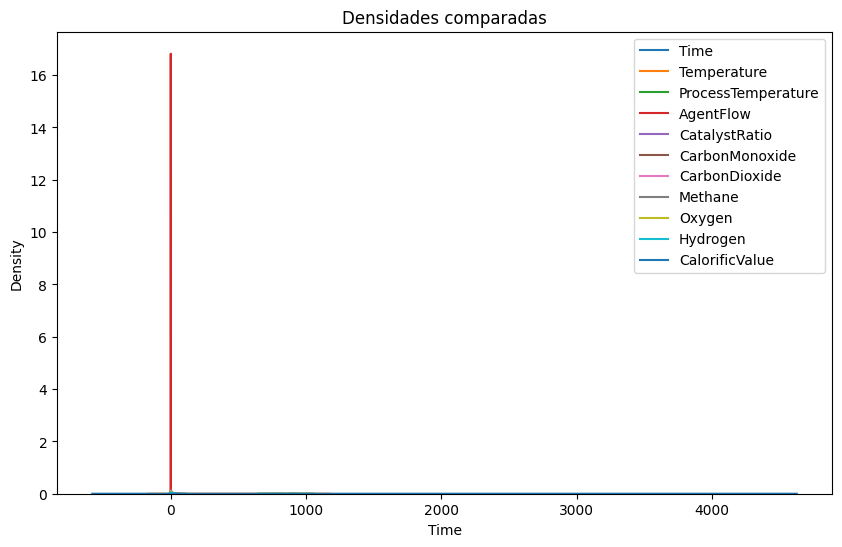

In [13]:
plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df_original[col], label=col)

plt.legend()
plt.title("Densidades comparadas")
plt.show()


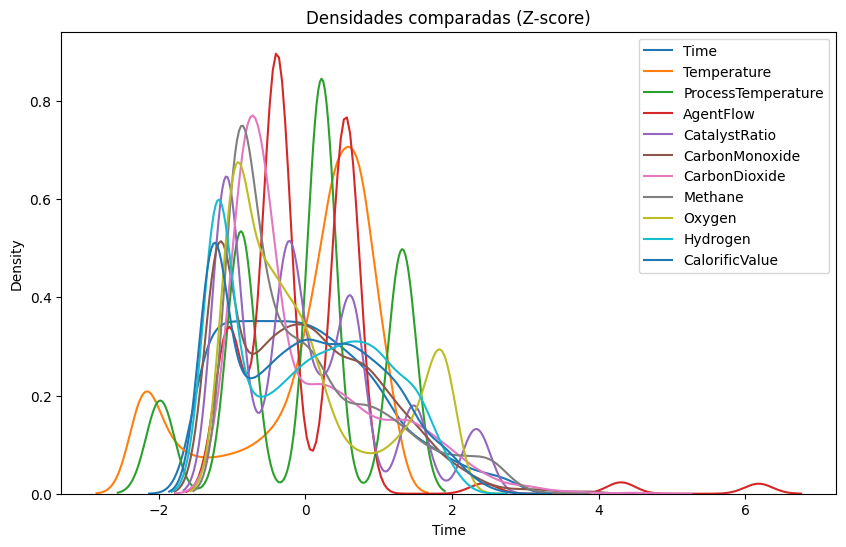

In [14]:
df_scaled[num_cols] = scaler.fit_transform(df_original[num_cols])

plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df_scaled[col], label=col)

plt.legend()
plt.title("Densidades comparadas (Z-score)")
plt.show()


# Resumen cuarta etapa:

- fue necesario estandarizar las variables, ya que para el análisis de densidad, el rango de la temperatura es mas amplio que las demas variables
- se observan comportamiento multimodal en algunas variables
- se observa comportamiendo asimétrico en algunas variables

# Relaciones entre variables
- Matriz de correlación
- Pairplots
- Gráficos de análisis

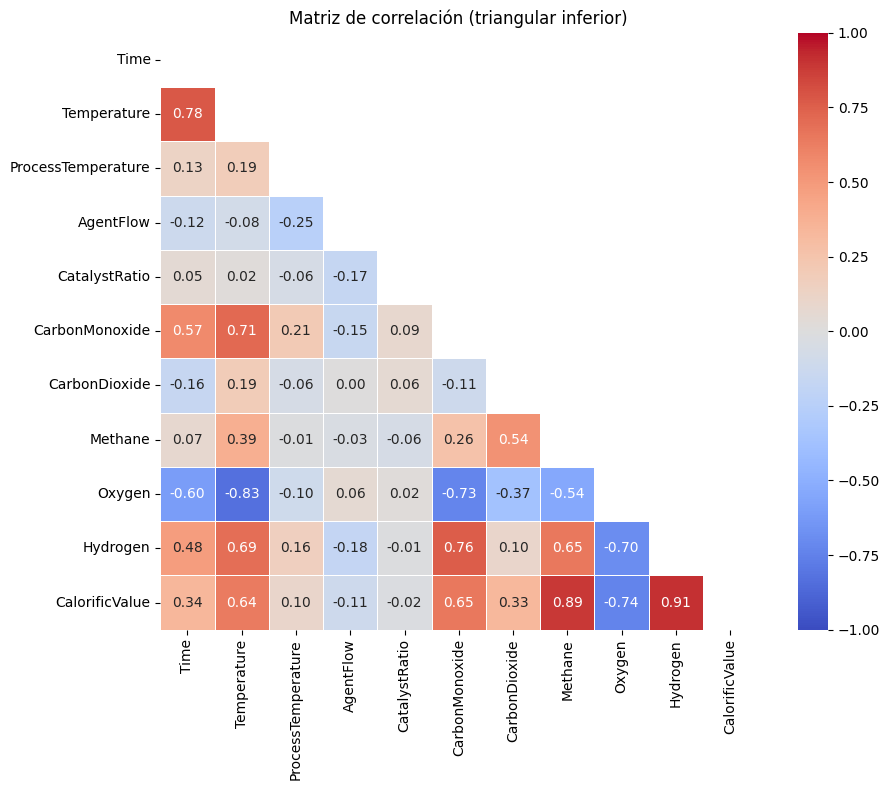

In [15]:
corr_matrix = df_original[num_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    vmin = -1,
    vmax = 1,
)

plt.title("Matriz de correlación (triangular inferior)")
plt.tight_layout()
plt.show()



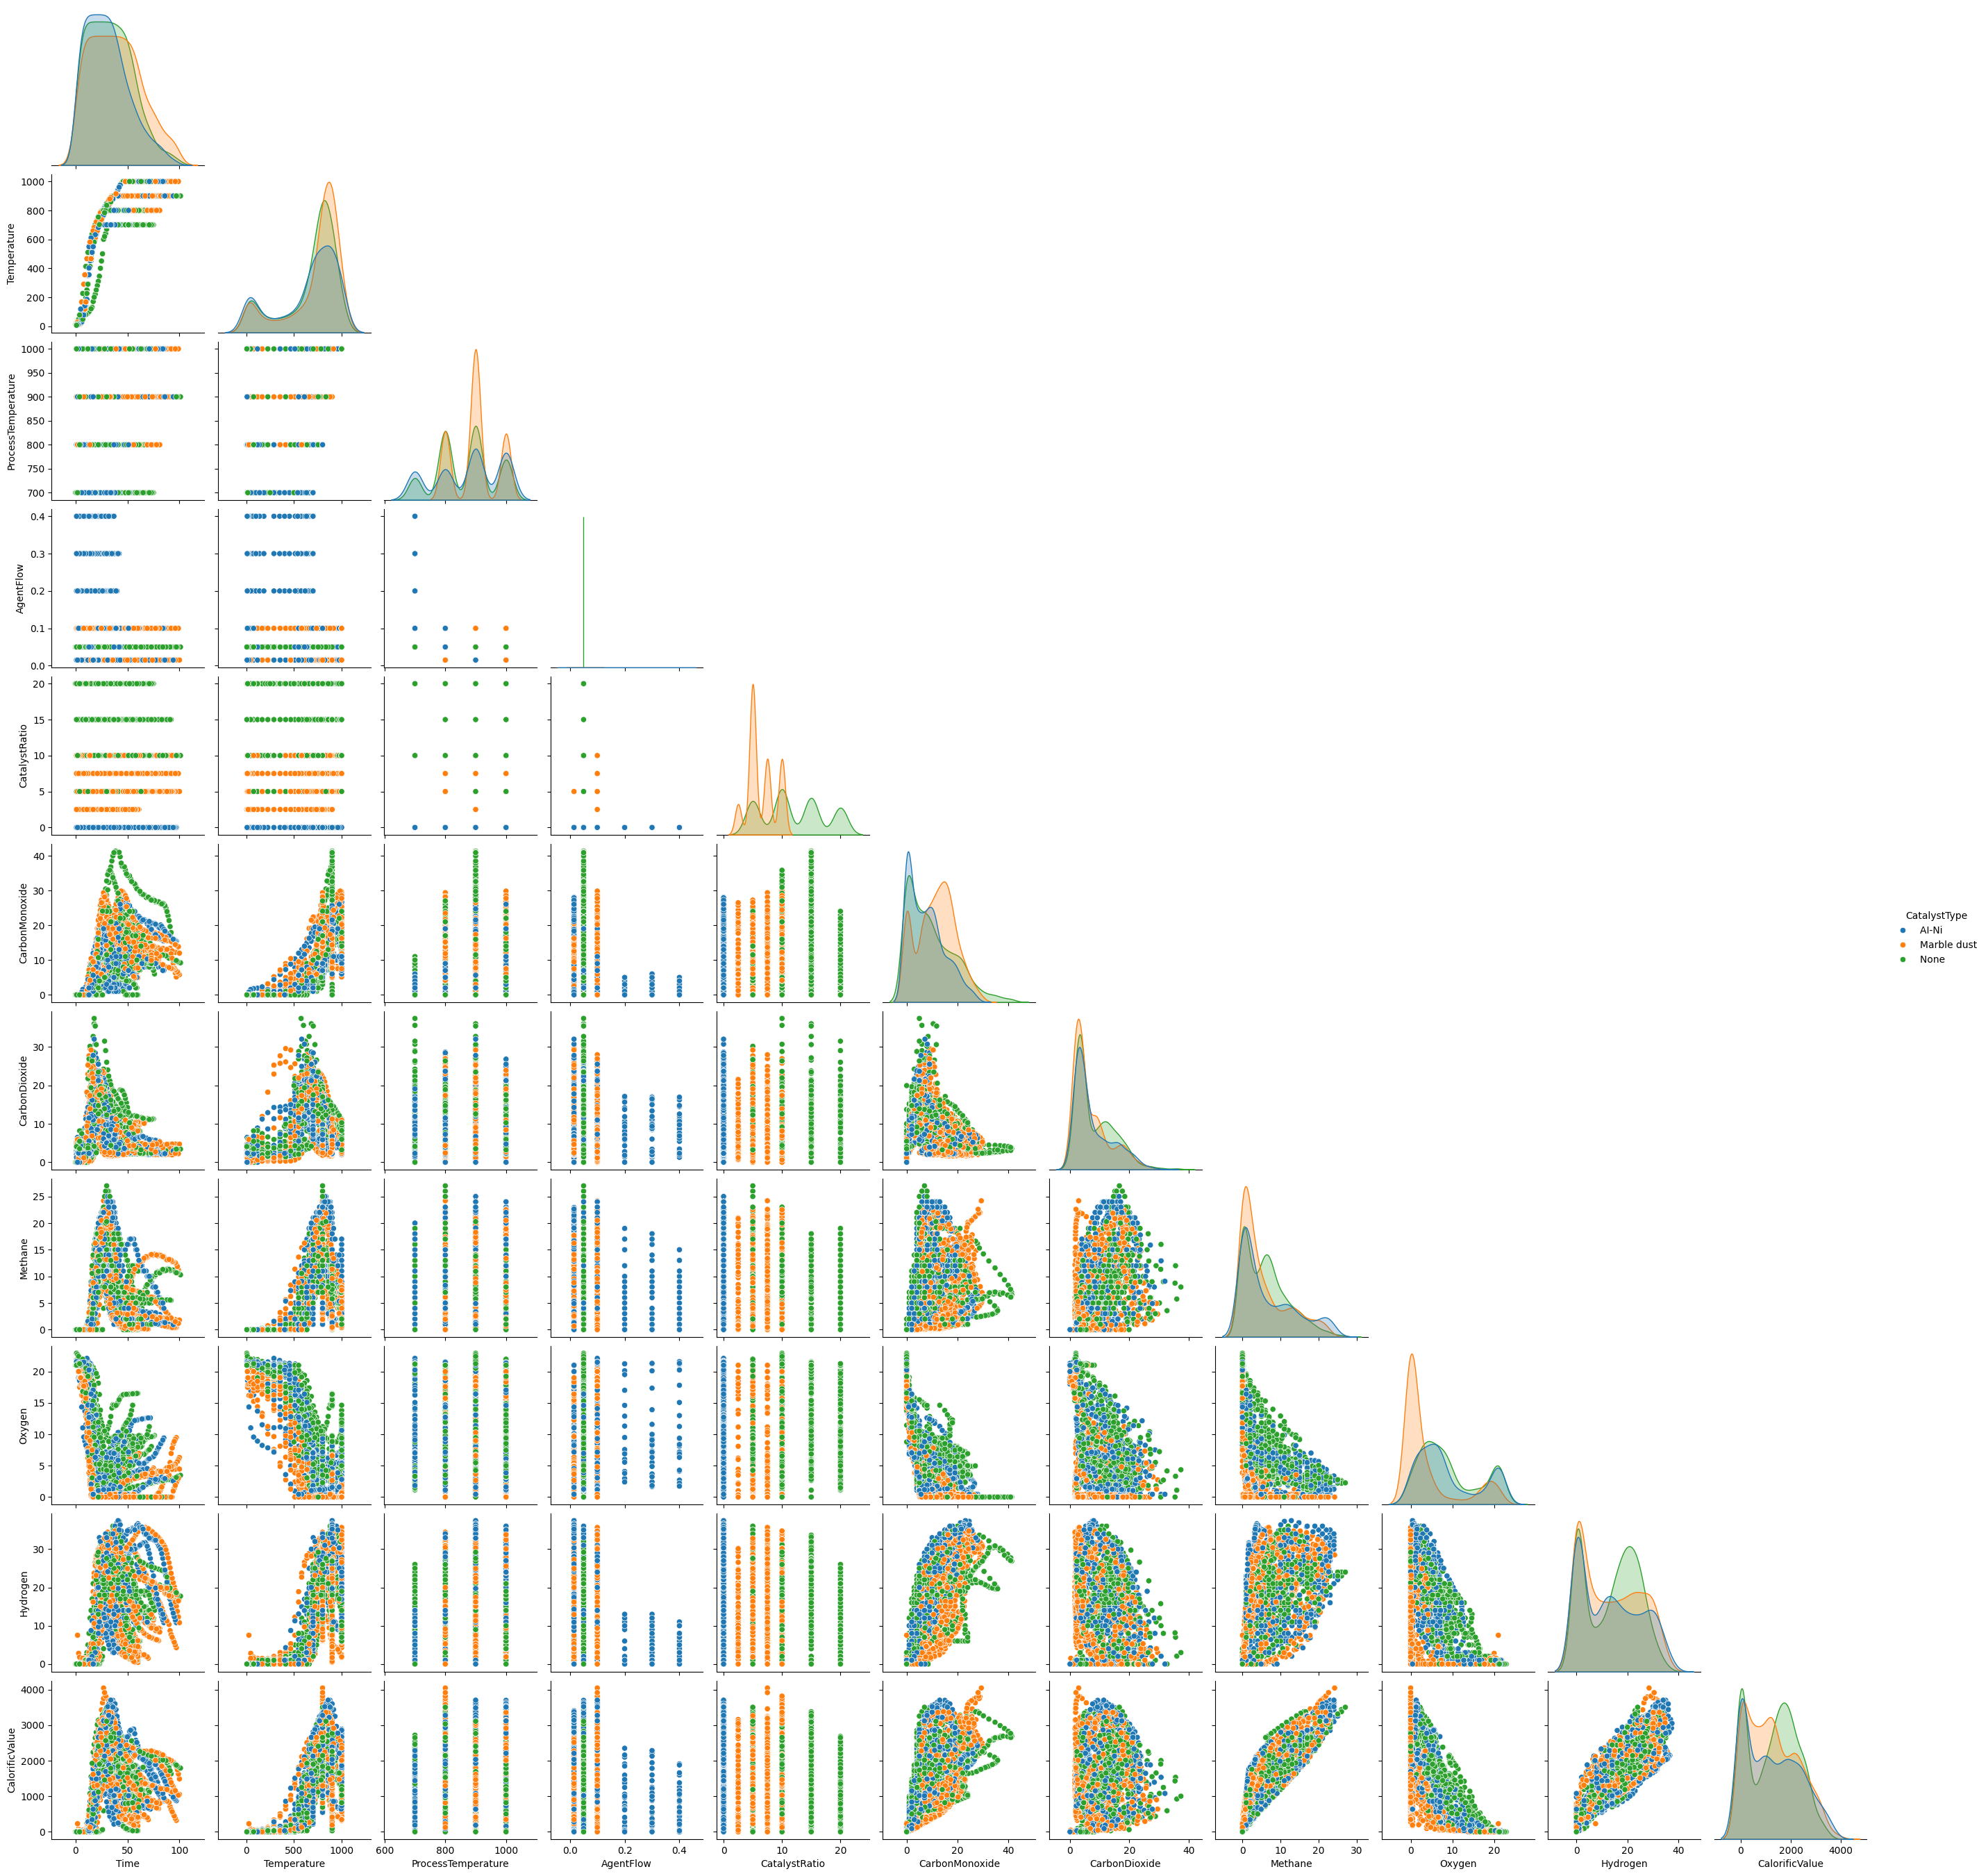

In [16]:
sns.pairplot(
    df_original,
    vars=num_cols,
    hue="CatalystType", #CatalystType, SampleType, AgentType
    diag_kind="kde",
    corner=True
)
plt.show()

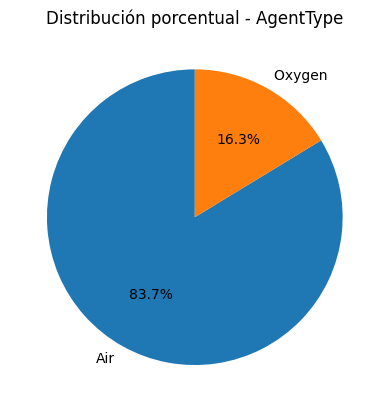

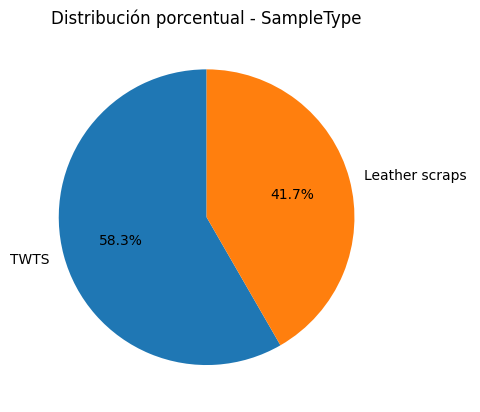

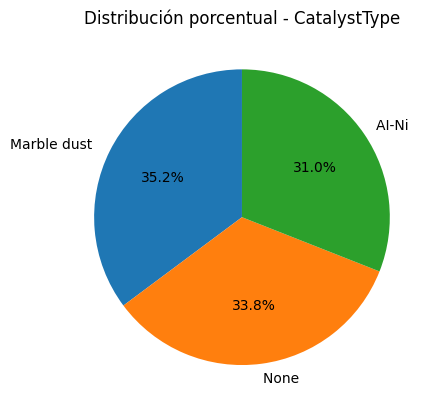

In [17]:
cat_cols = df_original.select_dtypes(include=["object", "category"]).columns

for col in cat_cols:
    counts = df_original[col].value_counts()
    
    plt.figure()
    plt.pie(
        counts,
        labels=counts.index,
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(f"Distribución porcentual - {col}")
    plt.show()


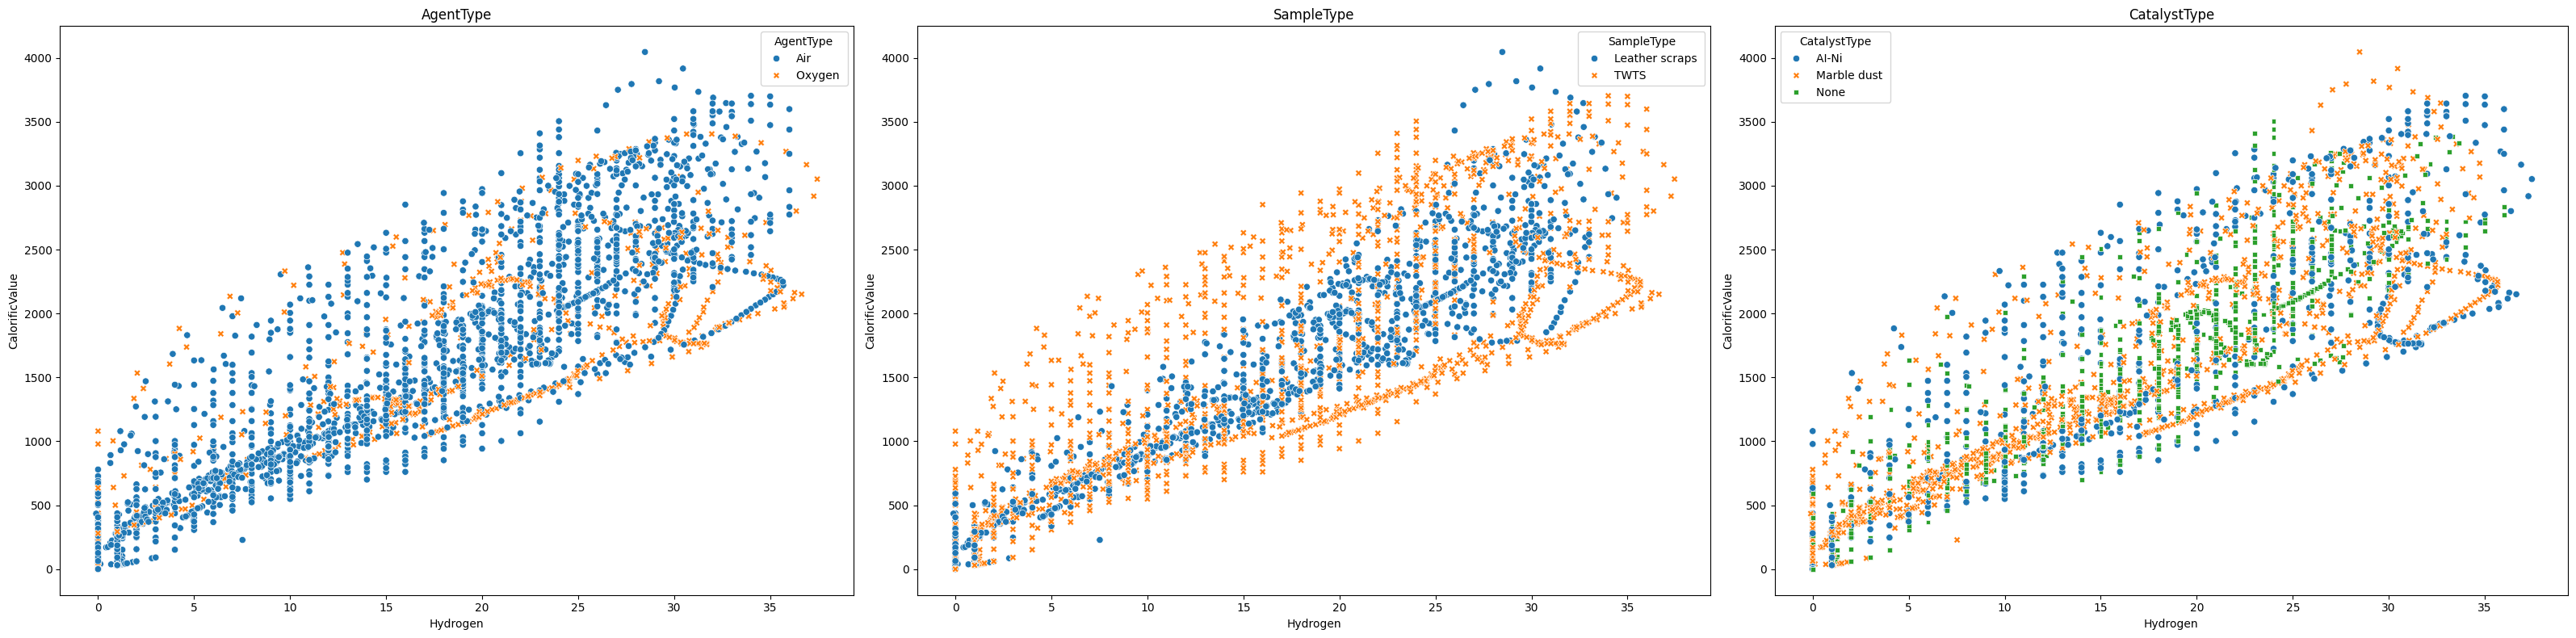

In [18]:
x_axis = 'Hydrogen'
y_axis = 'CalorificValue'
hue_axis = ['AgentType', 'SampleType', 'CatalystType']

fig, ax = plt.subplots(1, 3, figsize=(32, 8))
for i, h in enumerate(hue_axis):
    sns.scatterplot(data=df_original, x=x_axis, y=y_axis, hue=h, style=h, ax=ax[i])
    ax[i].set_title(h)
plt.tight_layout()
plt.show()

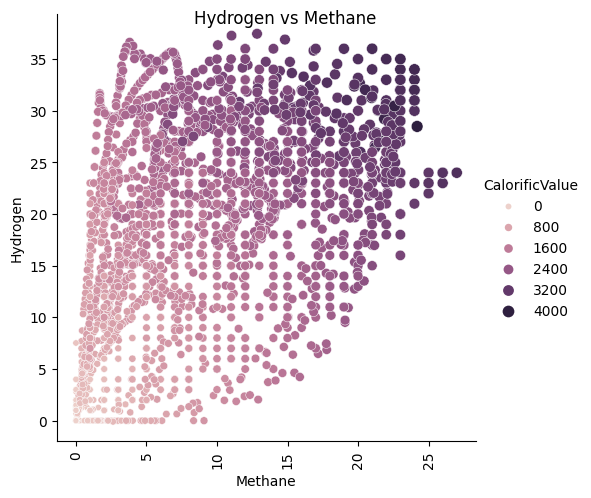

In [19]:
x_label_num = "Methane"
y_label_num = "Hydrogen"
hue_data_num = "CalorificValue"

g = sns.relplot(x=x_label_num, y=y_label_num, data=df_original, size=hue_data_num, hue=hue_data_num) #seems kind scatter is not necesary
g.fig.suptitle(f'{y_label_num} vs '+x_label_num)
g.set(xlabel=x_label_num, ylabel=y_label_num)
plt.xticks(rotation=90)
plt.show()

# Resumen quinta etapa:
- mayor concentración de metano e hidrogeno, aumentan valor calorífico del syngas, 
- mayor transcurso del tiempo de operación tumba la concentración de oxígeno, agotando el existente dentro del gasificador
- hay un tiempo óptimo de operación en el que el valor calorífico es el mas alto
- aumentar la composición del oxígeno, disminuye la composición del hidrogeno
- las variables fijadas para las operaciones son temperatura de proceso, flujo del agente gasificante, y la tasa de catalizador